In [71]:
import cv2
import numpy as np
import time
from skimage.io import imshow,imread,imsave
from scipy import ndimage as ndi
from skimage import feature
import matplotlib.image as mpimg
from matplotlib import pyplot as plt
from skimage.morphology import square,dilation


In [72]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    channel_count = img.shape[2]
    match_mask_color = (255,) * channel_count
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

def save_image(img,name):
    imsave('./dataset/'+str(name)+'.jpg',img)

In [139]:
##--------------- find white,yellow pixel of lane (first) -------------------#
# def findWhitePixel(image,height,p_count):
#     y1 = []
#     p1 = 0
#     counter = 0
#     start=p_count
#     for pixel in image[height:height+1]:
#         for j in range (int(pixel.shape[0]/2)): 
#             if pixel[j+start] == 255:
#                 if counter == 0:
#                     p1 = p_count
#                     break         
#             p_count += 1
#         if p1 == 0:
#               return False
#         else:            
#             y1 = (p1,height)
#             return y1

#--------------- find white,yellow pixel of lane -------------------#
def findWhitePixel(image,height,p_count):
    y1 = y2 = []
    p1 = p2 = 0
    counter = 0
    start=p_count
    for pixel in image[height:height+1]:
        for j in range (int(pixel.shape[0]/2)): 
            if counter == 2:
                break
            if pixel[j+start] == 255 and counter == 0:
                p1 = p_count
                counter += 1
            if pixel[j+start] == 0 and counter == 1:
                p2 = p_count
                counter += 1            
            p_count += 1
        if p1 == 0 and p2 == 0:
              return False
        else: 
#             print("p1,p2   : ",(p1,p2))
            y1 = (int((p1+p2) / 2),height)
            return y1

#--------------- find slope of lane -------------------#
def slope(start,end,width):
    x1=start[0]
    x2=end[0]

    y1=width-start[1]
    y2=width-end[1]
    
    m=(y2-y1)/(x2-x1)
    return m
    

In [143]:
url='../video/video1.mjpeg'
cap = cv2.VideoCapture(url)
count=0
image=[]
while cap.isOpened():
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't receive frame (stream end?). Exiting ...")
        break
    frame = cv2.resize(frame,(640, 480))
    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
#     if(count%2==0):
        
    height=frame.shape[0]
    width=frame.shape[1]
    region_of_interest_vertices = [   
        (0, height),
        (0, height-(height/2-40)),
        ((width/6), (height/3)),

        (width-(width/6), (height/3)),
        (width, height-(height/2-40)),
        (width, height)]


    cropped_image = region_of_interest(frame,np.array([region_of_interest_vertices], np.int32))

    # color range
    lowerY=np.array([230,230,110])
    upperY=np.array([250,250,204])    
    maskY = cv2.inRange(cropped_image, lowerY, upperY)

    lowerW=np.array([231,231,231])
    upperW=np.array([255,255,255])    
    maskW = cv2.inRange(cropped_image, lowerW, upperW)

    lowerR=np.array([220,70,70])
    upperR=np.array([255,160,170])    
    maskR = cv2.inRange(cropped_image, lowerR, upperR)

    mask = maskY+maskW
    mask = dilation(mask, square(3))
    
    left=0
    right=int(mask.shape[1]/2)
    color = (255, 0, 0)
    thickness = 10
#     print(findWhitePixel(mask,200,left),findWhitePixel(mask,300,left))
    slopeLeft = slopeRight = None
    
    for i in range(16): 
        start=30*i
        end=30*(i+1)
        if(findWhitePixel(mask,start,left) and findWhitePixel(mask,end,left)):
            frame = cv2.line(cropped_image, 
                             findWhitePixel(mask,start,left), 
                             findWhitePixel(mask,end,left), 
                             color, 
                             thickness) 
            slopeLeft = slope(findWhitePixel(mask,start,left), findWhitePixel(mask,end,left),width)
        if(findWhitePixel(mask,start,right) and findWhitePixel(mask,end,right)):
            frame = cv2.line(cropped_image, 
                             findWhitePixel(mask,start,right), 
                             findWhitePixel(mask,end,right),
                             color, 
                             thickness)
            slopeRight = slope(findWhitePixel(mask,start,right), findWhitePixel(mask,end,right),width)
        if(slopeLeft and slopeRight):
            print('slope',slopeLeft,slopeRight)

    frame=cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cv2.imshow('frame', frame)
#     count+=1
    
#     image=maskR+maskW    
#     save_image(frame,count)
    
#     time.sleep(.50)

    if cv2.waitKey(1) == ord('q'):        
        break
        

        
cap.release()
cv2.destroyAllWindows()
# image=cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
# imshow(image)


slope 1.6666666666666667 -1.7647058823529411
slope 1.6666666666666667 -1.7647058823529411
slope 2.0 -1.7647058823529411
slope 2.0 -1.7647058823529411
slope 2.3076923076923075 -1.7647058823529411
slope 2.3076923076923075 -1.7647058823529411
slope 2.5 -2.3076923076923075
slope 2.727272727272727 -2.3076923076923075
slope 3.0 -2.3076923076923075
slope 3.0 -2.3076923076923075
slope 1.6666666666666667 -1.6666666666666667
slope 1.7647058823529411 -1.6666666666666667
slope 2.0 -1.6666666666666667
slope 2.142857142857143 -1.7647058823529411
slope 2.142857142857143 -1.7647058823529411
slope 2.3076923076923075 -1.7647058823529411
slope 2.5 -2.3076923076923075
slope 2.727272727272727 -2.3076923076923075
slope 3.0 -2.3076923076923075
slope 3.0 -2.3076923076923075
slope 1.6666666666666667 -1.6666666666666667
slope 1.7647058823529411 -1.6666666666666667
slope 2.0 -1.6666666666666667
slope 2.0 -1.7647058823529411
slope 2.3076923076923075 -1.7647058823529411
slope 2.3076923076923075 -1.7647058823529411

slope 1.7647058823529411 -1.6666666666666667
slope 2.0 -1.6666666666666667
slope 2.0 -1.7647058823529411
slope 2.3076923076923075 -1.7647058823529411
slope 2.3076923076923075 -1.7647058823529411
slope 2.5 -2.3076923076923075
slope 2.727272727272727 -2.3076923076923075
slope 3.0 -2.3076923076923075
slope 3.0 -2.3076923076923075
slope 1.6666666666666667 -1.875
slope 1.7647058823529411 -1.875
slope 2.0 -1.875
slope 2.0 -1.7647058823529411
slope 2.3076923076923075 -1.7647058823529411
slope 2.3076923076923075 -1.7647058823529411
slope 2.5 -2.142857142857143
slope 2.727272727272727 -2.5
slope 2.727272727272727 -2.5
slope 2.727272727272727 -2.5
slope 1.6666666666666667 -1.7647058823529411
slope 1.875 -1.7647058823529411
slope 1.875 -1.7647058823529411
slope 2.0 -1.7647058823529411
slope 2.3076923076923075 -1.7647058823529411
slope 2.3076923076923075 -1.7647058823529411
slope 2.5 -2.142857142857143
slope 2.727272727272727 -2.5
slope 3.0 -2.3076923076923075
slope 3.0 -2.3076923076923075
slope 1

slope 2.5 -2.3076923076923075
slope 2.5 -2.3076923076923075
slope 3.3333333333333335 -2.3076923076923075
slope 3.3333333333333335 -2.3076923076923075
slope 2.0 -1.7647058823529411
slope 2.3076923076923075 -1.7647058823529411
slope 2.3076923076923075 -1.7647058823529411
slope 2.5 -2.3076923076923075
slope 2.727272727272727 -2.3076923076923075
slope 3.0 -2.5
slope 3.0 -2.5
slope 2.0 -1.7647058823529411
slope 2.3076923076923075 -1.7647058823529411
slope 2.3076923076923075 -1.7647058823529411
slope 2.5 -2.142857142857143
slope 2.727272727272727 -2.5
slope 2.727272727272727 -2.3076923076923075
slope 2.727272727272727 -2.3076923076923075
slope 1.6666666666666667 -1.6666666666666667
slope 1.7647058823529411 -1.6666666666666667
slope 2.0 -1.6666666666666667
slope 2.0 -1.7647058823529411
slope 2.3076923076923075 -1.7647058823529411
slope 2.3076923076923075 -1.7647058823529411
slope 2.5 -2.3076923076923075
slope 2.5 -2.3076923076923075
slope 3.0 -2.5
slope 3.0 -2.5
slope 1.6666666666666667 -1.66

slope 2.0 -1.7647058823529411
slope 2.142857142857143 -1.7647058823529411
slope 2.5 -1.7647058823529411
slope 2.5 -2.142857142857143
slope 2.727272727272727 -2.5
slope 2.727272727272727 -2.3076923076923075
slope 2.727272727272727 -2.3076923076923075
slope 1.6666666666666667 -1.6666666666666667
slope 1.7647058823529411 -1.6666666666666667
slope 2.0 -1.6666666666666667
slope 2.0 -1.7647058823529411
slope 2.142857142857143 -1.7647058823529411
slope 2.5 -1.7647058823529411
slope 2.5 -2.142857142857143
slope 2.5 -2.5
slope 3.0 -2.3076923076923075
slope 3.0 -2.3076923076923075
slope 1.6666666666666667 -2.0
slope 1.7647058823529411 -2.0
slope 2.0 -2.0
slope 2.0 -1.7647058823529411
slope 2.3076923076923075 -1.7647058823529411
slope 2.3076923076923075 -1.7647058823529411
slope 2.5 -2.142857142857143
slope 2.5 -2.5
slope 3.0 -2.3076923076923075
slope 3.0 -2.3076923076923075
slope 1.6666666666666667 -1.6666666666666667
slope 1.7647058823529411 -1.6666666666666667
slope 2.0 -1.6666666666666667
slo

slope 2.5 -2.142857142857143
slope 2.727272727272727 -2.5
slope 2.727272727272727 -2.3076923076923075
slope 2.727272727272727 -2.3076923076923075
slope 2.0 -1.7647058823529411
slope 2.3076923076923075 -1.7647058823529411
slope 2.3076923076923075 -1.7647058823529411
slope 2.5 -2.3076923076923075
slope 2.5 -2.3076923076923075
slope 3.0 -2.3076923076923075
slope 3.0 -2.3076923076923075
slope 2.0 -1.7647058823529411
slope 2.142857142857143 -1.7647058823529411
slope 2.5 -1.7647058823529411
slope 2.5 -2.142857142857143
slope 2.5 -2.3076923076923075
slope 3.3333333333333335 -2.5
slope 3.3333333333333335 -2.5
slope 1.6666666666666667 -2.3076923076923075
slope 1.7647058823529411 -2.3076923076923075
slope 2.0 -2.3076923076923075
slope 2.0 -1.7647058823529411
slope 2.3076923076923075 -1.7647058823529411
slope 2.142857142857143 -1.7647058823529411
slope 2.727272727272727 -2.142857142857143
slope 2.5 -2.3076923076923075
slope 3.3333333333333335 -2.5
slope 3.3333333333333335 -2.5
slope 1.66666666666

slope 3.0 -2.5
slope 3.0 -2.5
slope 2.0 -1.875
slope 2.142857142857143 -2.0
slope 2.5 -2.0
slope 2.5 -2.0
slope 3.0 -2.5
slope 3.0 -2.5
slope 1.875 -1.7647058823529411
slope 1.875 -1.5789473684210527
slope 2.0 -2.3076923076923075
slope 2.142857142857143 -2.142857142857143
slope 2.3076923076923075 -2.142857142857143
slope 2.727272727272727 -2.142857142857143
slope 2.5 -2.142857142857143
slope 2.5 -2.142857142857143
slope 1.7647058823529411 -1.875
slope 1.7647058823529411 -1.6666666666666667
slope 1.875 -1.6666666666666667
slope 2.0 -1.6666666666666667
slope 2.3076923076923075 -2.0
slope 2.3076923076923075 -2.3076923076923075
slope 2.727272727272727 -2.3076923076923075
slope 2.727272727272727 -2.3076923076923075
slope 2.727272727272727 -2.3076923076923075
slope 1.6666666666666667 -2.3076923076923075
slope 1.875 -1.3043478260869565
slope 1.875 -1.3043478260869565
slope 2.142857142857143 -1.3043478260869565
slope 2.0 -2.142857142857143
slope 2.3076923076923075 -2.3076923076923075
slope 2.5

slope 1.7647058823529411 -1.5789473684210527
slope 2.0 -1.5789473684210527
slope 2.0 -1.5789473684210527
slope 2.142857142857143 -1.875
slope 2.5 -1.875
slope 2.5 -1.875
slope 2.5 -1.875
slope 3.0 -2.727272727272727
slope 3.0 -2.727272727272727
slope 2.3076923076923075 -2.0
slope 2.3076923076923075 -2.142857142857143
slope 2.5 -2.142857142857143
slope 2.5 -2.142857142857143
slope 3.0 -2.727272727272727
slope 3.0 -2.727272727272727
slope 1.875 -1.875
slope 2.0 -1.6666666666666667
slope 2.142857142857143 -2.0
slope 2.3076923076923075 -2.142857142857143
slope 2.5 -2.142857142857143
slope 2.727272727272727 -2.142857142857143
slope 3.0 -2.142857142857143
slope 3.0 -2.142857142857143
slope 1.6666666666666667 -1.7647058823529411
slope 1.7647058823529411 -1.4285714285714286
slope 1.875 -1.6666666666666667
slope 2.0 -1.6666666666666667
slope 2.142857142857143 -1.6666666666666667
slope 2.5 -2.0
slope 2.5 -2.3076923076923075
slope 2.727272727272727 -2.3076923076923075
slope 3.0 -2.307692307692307

slope 1.5789473684210527 -2.0
slope 1.5789473684210527 -1.6666666666666667
slope 1.7647058823529411 -1.7647058823529411
slope 1.875 -5.0
slope 1.875 -2.727272727272727
slope 2.3076923076923075 -2.727272727272727
slope 2.142857142857143 -2.727272727272727
slope 2.5 -1.5
slope 2.5 -1.5
slope 1.6666666666666667 -1.7647058823529411
slope 1.6666666666666667 -1.7647058823529411
slope 1.875 -1.7647058823529411
slope 1.875 -3.3333333333333335
slope 2.142857142857143 -1.3636363636363635
slope 2.3076923076923075 -1.3636363636363635
slope 2.3076923076923075 -1.3636363636363635
slope 2.3076923076923075 -1.3636363636363635
slope 1.5789473684210527 -1.7647058823529411
slope 1.7647058823529411 -1.7647058823529411
slope 1.7647058823529411 -1.7647058823529411
slope 2.0 -3.75
slope 2.142857142857143 -1.3636363636363635
slope 2.3076923076923075 -1.3636363636363635
slope 2.3076923076923075 -1.3636363636363635
slope 2.3076923076923075 -1.3636363636363635
slope 1.5789473684210527 -1.7647058823529411
slope 1

ZeroDivisionError: division by zero

False


C:\Users\Bermuda\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and
C:\Users\Bermuda\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:1400: MatplotlibDeprecationWarning: The 'box-forced' keyword argument is deprecated since 2.2.
  " since 2.2.", cbook.mplDeprecation)


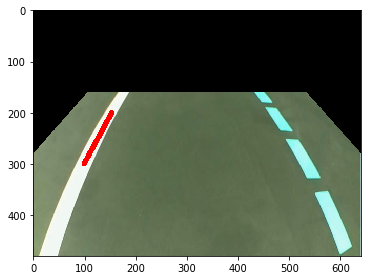

In [117]:
image = imread('./dataset/0.jpg')
image = cv2.resize(image,(640, 480)) 
height=image.shape[0]
width=image.shape[1]
region_of_interest_vertices = [   
    (0, height),
    (0, height-(height/2-40)),
    ((width/6), (height/3)),

    (width-(width/6), (height/3)),
    (width, height-(height/2-40)),
    (width, height)]


cropped_image = region_of_interest(image,np.array([region_of_interest_vertices], np.int32))
cropped_image = cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB)

# color range
lowerY=np.array([230,230,110])
upperY=np.array([250,250,204])    
maskY = cv2.inRange(cropped_image, lowerY, upperY)

lowerW=np.array([231,231,231])
upperW=np.array([255,255,255])    
maskW = cv2.inRange(cropped_image, lowerW, upperW)

lowerR=np.array([220,70,70])
upperR=np.array([255,160,170])    
maskR = cv2.inRange(cropped_image, lowerR, upperR)

mask = maskY+maskW
mask = dilation(mask, square(3))

left=0
right=int(mask.shape[1]/2)
color = (255, 0, 0)
thickness = 10


print(findWhitePixel(mask,int(height/2),right))
if(findWhitePixel(mask,200,left) and findWhitePixel(mask,300,left)):
    frame = cv2.line(cropped_image, findWhitePixel(mask,200,left), findWhitePixel(mask,300,left), color, thickness) 
if(findWhitePixel(mask,200,right) and findWhitePixel(mask,300,right)):
    frame = cv2.line(cropped_image, findWhitePixel(mask,200,right), findWhitePixel(mask,300,right), color, thickness)

imshow(frame)

In [ ]:
# left=0
# right=int(mask.shape[1]/2)
# color = (255, 0, 0)
# thickness = 10


# m=(y2-y1)/(x2-x1)
# print(str(x2),' ',str(x1))
# print(str(y2),' ',str(y1))
# findWhitePixel(mask,300,left)
# findWhitePixel(mask,600,left)
# findWhitePixel(mask,300,right)
# findWhitePixel(mask,600,right)

# image = cv2.line(image, findWhitePixel(mask,300,left), findWhitePixel(mask,600,left), color, thickness) 
# image = cv2.line(image, findWhitePixel(mask,300,right), findWhitePixel(mask,600,right), color, thickness)

# imshow(image) 

In [128]:
print(mask[300])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 